In [32]:
#knitr::opts_chunk$set(echo = TRUE)

# 1. Cài đặt các gói cần thiết

In [33]:
# List of packages for session
.packages = c("randomForest", "e1071", "ggplot2", "klaR", "xgboost", "magrittr", "dplyr")

# Install CRAN packages (if not already installed)
.inst <- .packages %in% installed.packages()
if(length(.packages[!.inst]) > 0) install.packages(.packages[!.inst], repos = "https://cran.rstudio.com")

# Load packages into session 
lapply(.packages, require, character.only=TRUE)

library(caret)
library(randomForest)
library(e1071)
library(klaR)
library(xgboost)
library(dplyr)
library(magrittr)

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

# 2 .Tải data

Sử dụng tập dữ liệu iris để thực hiện bài toán phân loại với các thuật toán được đề cập trong bài báo cáo.

In [34]:
# đính kèm tập dữ liệu iris từ môi trường
data(iris)
# đổi tên dataset
dataset <- iris

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

## 2.1. Tạo tập dữ liệu Validation

Ở đây, chúng ta sẽ chia tập dữ liệu thành 2 phần là: \

+ 80% dữ liệu training mô hình \
+ 20% dữ liệu validation để phục vụ việc đánh giá mô hình

In [35]:
# tạo danh sách 80% các hàng trong tập dữ liệu ban để training  
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)

# Chọn 20% dữ liệu cho tâp validation
validation <- dataset[-validation_index,]

# sử dụng 80% dữ liệu cho training và testing
training <- dataset[validation_index,]

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

# 3. Tóm tắt Dataset
Trong bước này, chúng ta sẽ xem xét dữ liệu theo một số cách khác nhau: \

+ Kích thước của tập dữ liệu.\
+ Các loại thuộc tính.\
+ Nhìn vào chính dữ liệu.\
+ Các cấp độ của thuộc tính lớp.\
+ Phân tích các cá thể trong mỗi lớp.\
+ Tóm tắt thống kê của tất cả các thuộc tính.

## 3.1. Kích thước của dữ liệu

In [36]:
dim(training)

[1] 120   5

Có 120 record (hàng) và 5 thuộc tính (cột)

## 3.2. Các loại của thuộc tính

In [37]:
# list types for each attribute
sapply(training, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

## 3.4. Xem qua dữ liệu

5 hàng đầu tiên của dữ liệu

In [38]:
# xem qua 5 hàng đầu tiên của dữ liệu
head(training)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa


## 3.5. Các cấp độ của Class

In [39]:
# danh sách các lớp
levels(training$Species)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

[1] "setosa"     "versicolor" "virginica"

Như ta thấy, ta có 3 lớp trong tập dữ liệu Iris này

## 3.6. Phân phối dữ liệu theo lớp

In [40]:

# Tối tắt phân phối dữ liệu theo lớp
percentage <- prop.table(table(training$Species)) * 100
cbind(freq=table(training$Species), percentage=percentage)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

,freq,percentage
setosa,40,33.33333
versicolor,40,33.33333
virginica,40,33.33333


Chúng ta có thể thấy rằng mỗi lớp có cùng số lượng các trường hợp (40 hoặc 33% tập dữ liệu)

## 3.7. Thống kế tóm tắt
Bây giờ cuối cùng, chúng ta có thể xem qua bản tóm tắt của từng thuộc tính.\ 

Điều này bao gồm giá trị trung bình, giá trị tối thiểu và tối đa cũng như một số phân vị phần trăm (giá trị thứ 25, 50 hoặc phương tiện và 75, ví dụ: tại các điểm này nếu chúng ta đã sắp xếp tất cả các giá trị cho một thuộc tính).

In [41]:
# summarize attribute distributions
summary(training)

  Sepal.Length    Sepal.Width    Petal.Length    Petal.Width          Species  
 Min.   :4.300   Min.   :2.00   Min.   :1.000   Min.   :0.100   setosa    :40  
 1st Qu.:5.100   1st Qu.:2.80   1st Qu.:1.575   1st Qu.:0.300   versicolor:40  
 Median :5.800   Median :3.00   Median :4.400   Median :1.350   virginica :40  
 Mean   :5.846   Mean   :3.07   Mean   :3.773   Mean   :1.212                  
 3rd Qu.:6.400   3rd Qu.:3.40   3rd Qu.:5.100   3rd Qu.:1.800                  
 Max.   :7.900   Max.   :4.40   Max.   :6.900   Max.   :2.500                  

Chúng ta có thể thấy rằng tất cả các giá trị số có cùng tỷ lệ (cm) và phạm vi tương tự [0,8] cm.

# 4. Trực quan tập dữ liệu

Chúng ta sẽ xem xét dữ liệu bằng hai loại biểu đồ:\

1. Biểu đồ đơn biến để hiểu rõ hơn về từng thuộc tính\
2. Biểu đồ đa biến để hiểu rõ hơn về mối quan hệ của các thuộc tính với nhau.

## 4.1. Biểu đồ đơn biến

In [42]:
# chia đầu vào và đầu ra tập train
x <- training[,1:4]
y <- training[,5]

# chia đầu vào và đầu ra tập validation
x_val <- validation[,1:4]
y_val <- validation[,5]

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

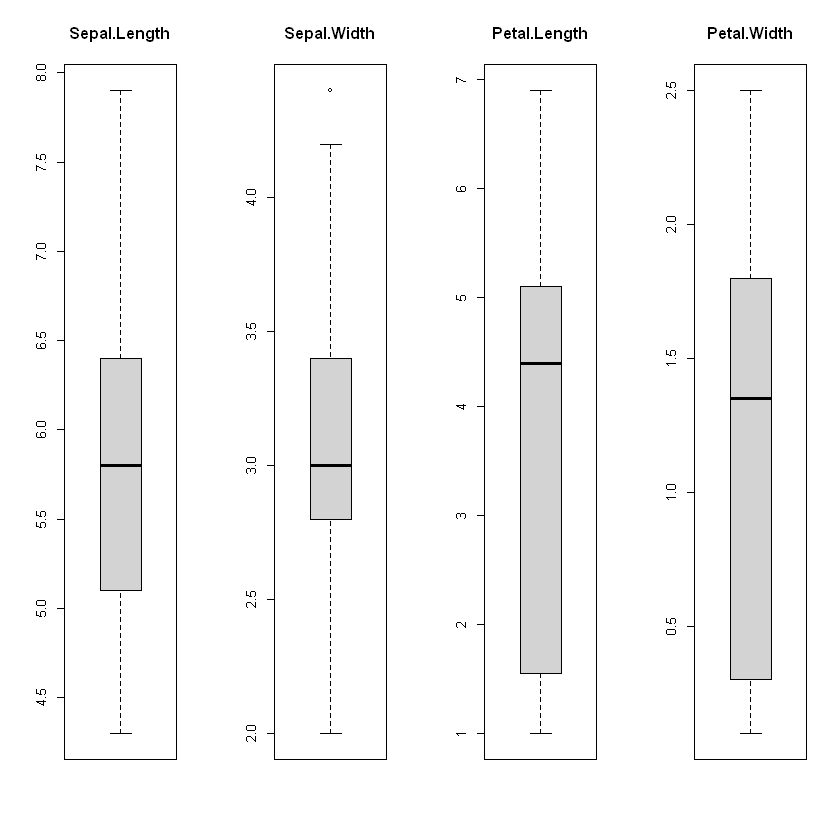

In [43]:
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

## 4.2. Biểu đồ đa biến

<!-- # ```{r} -->
<!-- # install.packages("ellipse") -->
<!-- # ``` -->

Đầu tiên, hãy xem biểu đồ phân tán của tất cả các cặp thuộc tính và tô màu các điểm theo lớp. Ngoài ra, bởi vì biểu đồ phân tán cho thấy rằng các điểm cho mỗi lớp nói chung là riêng biệt, chúng ta có thể vẽ các hình elip xung quanh chúng.

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

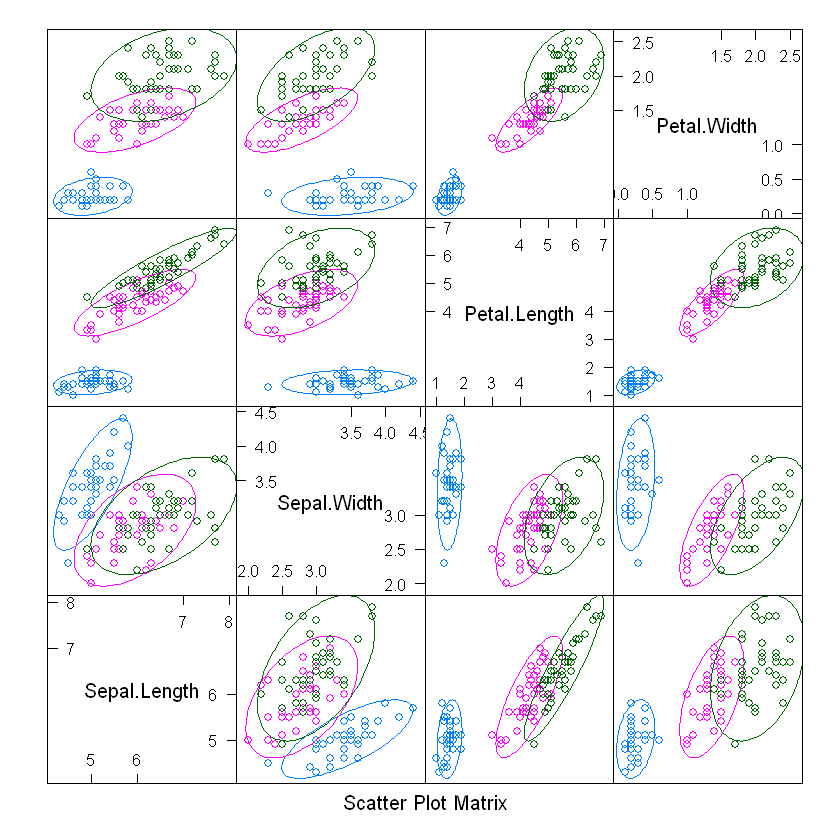

In [44]:
# ma trận biểu đồ phân tán
featurePlot(x=x, y=y, plot="ellipse")

Chúng ta có thể thấy một số mối quan hệ rõ ràng giữa các thuộc tính đầu vào (xu hướng) và giữa các thuộc tính và giá trị lớp (dấu chấm lửng)

Chúng ta cũng có thể xem xét lại các ô hình hộp và ô râu của từng biến đầu vào, nhưng lần này được chia thành các ô riêng biệt cho từng lớp. Điều này có thể giúp tạo ra sự phân cách tuyến tính rõ ràng giữa các lớp.
\Điều này rất hữu ích để thấy rằng có sự phân phối rõ ràng khác nhau của các thuộc tính cho mỗi giá trị lớp.        

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

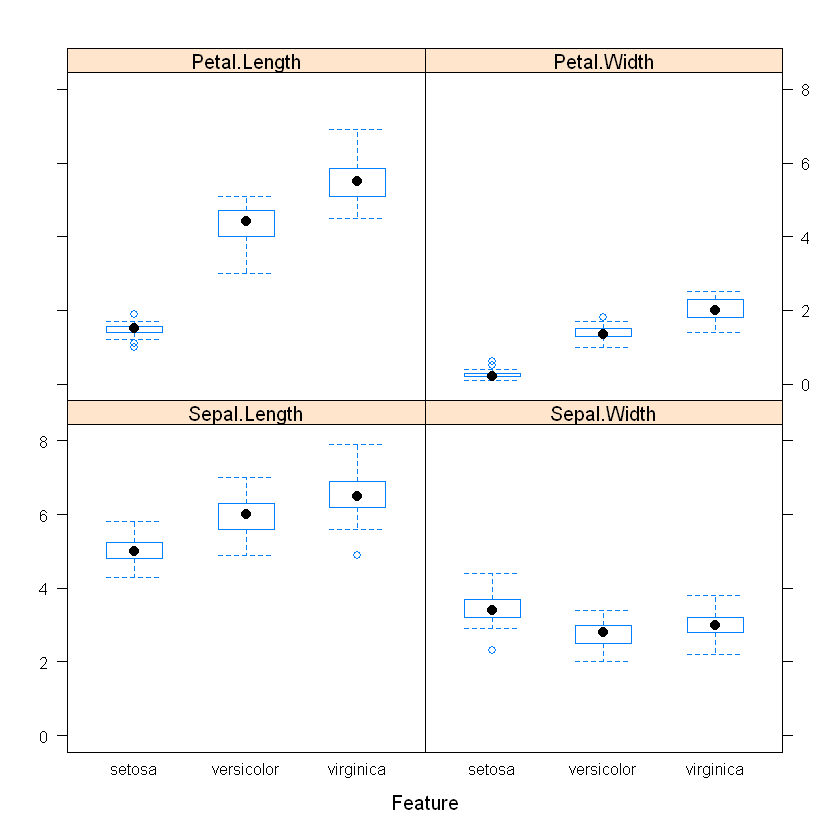

In [45]:
# đồ thị hộp và whisker cho mỗi thuộc tính
featurePlot(x=x, y=y, plot="box")

Tiếp theo, chúng ta có thể có được ý tưởng về sự phân bố của từng thuộc tính, một lần nữa giống như đồ thị hộp và whisker, được chia nhỏ theo giá trị lớp. Đôi khi biểu đồ là tốt cho điều này, nhưng trong trường hợp này, chúng tôi sẽ sử dụng một số biểu đồ mật độ xác suất để cung cấp các đường trơn đẹp cho mỗi phân phối.

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

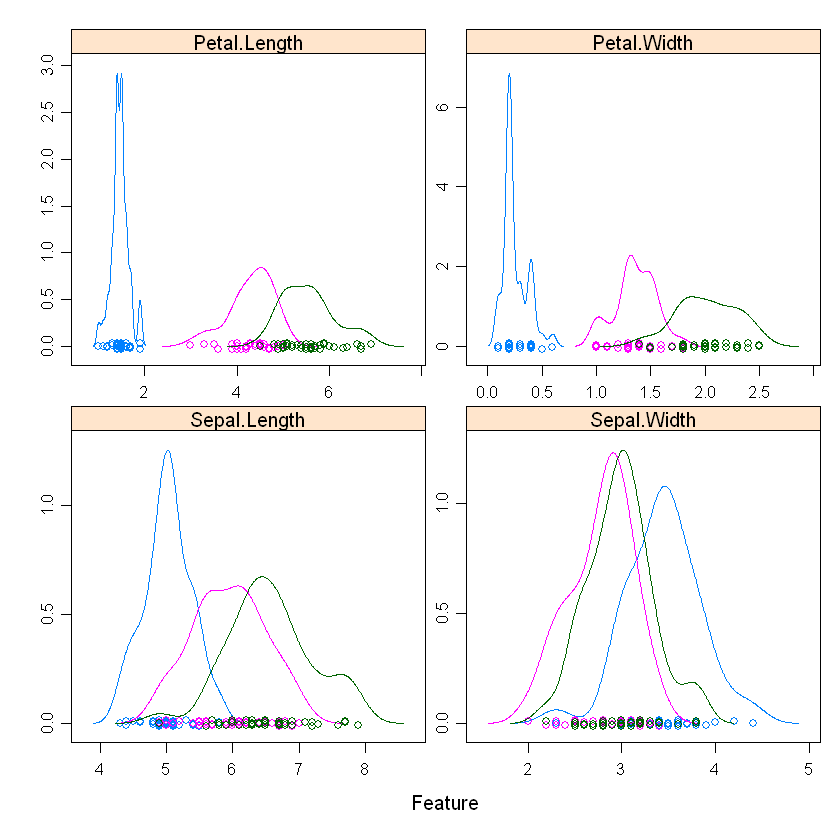

In [46]:

# đồ thị mật độ cho từng thuộc tính theo giá trị lớp
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

Giống như các ô hộp, chúng ta có thể thấy sự khác biệt trong phân phối của từng thuộc tính theo giá trị lớp. Chúng ta cũng có thể thấy sự phân bố giống như Gaussian (đường cong hình chuông) của mỗi thuộc tính

# 5. Đánh giá một số thuật toán

Bây giờ đã đến lúc tạo một số mô hình dữ liệu các thuật toán được trình bày trong báo cáo và ước tính độ chính xác của chúng trên dữ liệu validation

Đây là những gì chúng ta sẽ đề cập trong bước này:

1. Thiết lập dây kiểm tra để sử dụng xác nhận chéo 10 lần.
2. Xây dựng 5 mô hình khác nhau để dự đoán các loài từ các phép đo hoa
3. Chọn mô hình tốt nhất.

## 5.1. Cài đặt thử nghiệm

Chúng ta sẽ xác thực chéo 10 lần để ước tính độ chính xác.

Điều này sẽ chia bộ dữ liệu của chúng tôi thành 10 phần, đào tạo trong 9 và kiểm tra trên 1 và phát hành cho tất cả các kết hợp phân tách kiểm tra đào tạo. Chúng tôi cũng sẽ lặp lại quy trình này 3 lần cho mỗi thuật toán với các phần dữ liệu khác nhau được chia thành 10 nhóm, nhằm cố gắng có được ước tính chính xác hơn.

In [47]:
# Run algorithms using 10-fold cross validation
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

Chúng ta đang sử dụng chỉ số “accuracy” để đánh giá các mô hình. Đây là tỷ lệ giữa số trường hợp được dự đoán chính xác chia cho tổng số trường hợp trong tập dữ liệu nhân với 100 để đưa ra tỷ lệ phần trăm (ví dụ: chính xác 95%). Chúng tôi sẽ sử dụng biến metric khi chúng tôi chạy xây dựng và đánh giá từng mô hình tiếp theo.

## 5.2. Xây dựng các mô hình gói caret

Với 5 thuật toán trong báo cáo, nhóm không biết thuật toán nào sẽ tốt cho vấn đề này hoặc sử dụng cấu hình nào.

Xét 5 thuật toán nhóm đã trình bày trong báo cáo

+ k-Nearest Neighbors (kNN).
+ Support Vector Machines (SVM) with a linear kernel.
+ Random Forest (RF)
+ XGboost
+ NavieBayes 


In [48]:
set.seed(7)
fit.nb <- train(Species~., data=training, method="nb", metric=metric, trControl=control)

# kNN
set.seed(7)
fit.knn <- train(Species~., data=training, method="knn", metric=metric, trControl=control)

# c) advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(Species~., data=training, method="svmRadial", metric=metric, trControl=control)

set.seed(7)
fit.rf <- train(Species~., data=training, method="rf", metric=metric, trControl=control)

## 5.1. Chọn mô hình tốt nhất

In [49]:

#summarize accuracy of models
results <- resamples(list(nb=fit.nb, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: nb, knn, svm, rf 
Number of resamples: 10 

Accuracy 
         Min.   1st Qu.    Median Mean 3rd Qu. Max. NA's
nb  0.8333333 0.9166667 0.9583333 0.95       1    1    0
knn 0.9166667 0.9166667 0.9166667 0.95       1    1    0
svm 0.8333333 0.9166667 0.9583333 0.95       1    1    0
rf  0.8333333 0.9166667 0.9583333 0.95       1    1    0

Kappa 
     Min. 1st Qu. Median  Mean 3rd Qu. Max. NA's
nb  0.750   0.875 0.9375 0.925       1    1    0
knn 0.875   0.875 0.8750 0.925       1    1    0
svm 0.750   0.875 0.9375 0.925       1    1    0
rf  0.750   0.875 0.9375 0.925       1    1    0


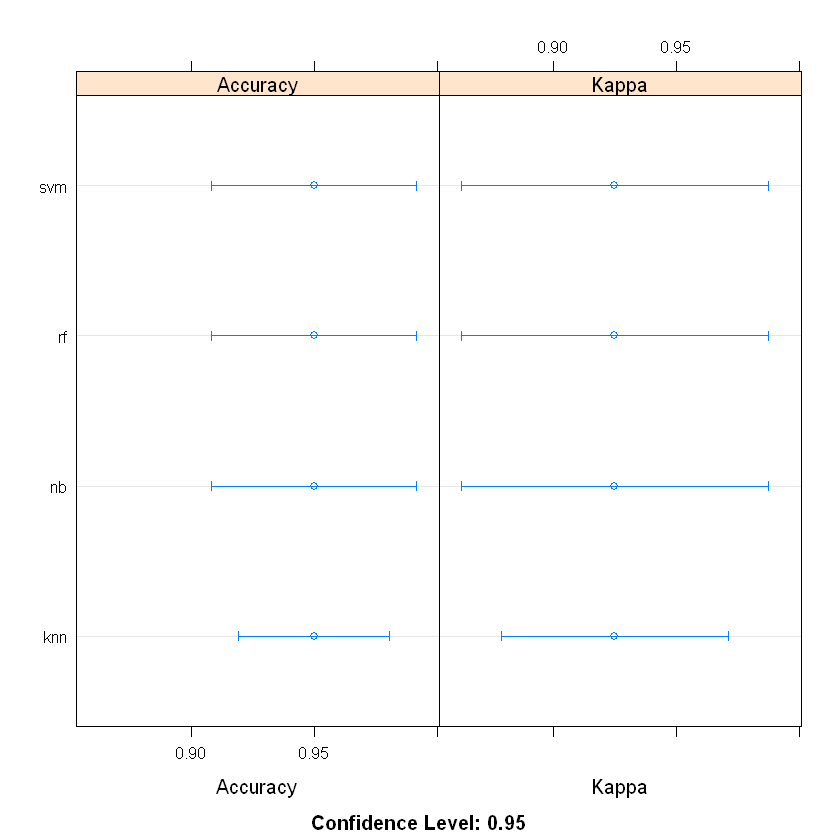

In [50]:
# compare accuracy of models
dotplot(results)

In [51]:
# summarize Best Model
print(fit.knn)

k-Nearest Neighbors 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa 
  5  0.9500000  0.9250
  7  0.9500000  0.9250
  9  0.9416667  0.9125

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 7.


## 5.2. Tạo dự đoán từ mô hình tốt nhất

In [52]:
# estimate skill of LDA on the validation dataset
predictions <- predict(fit.knn, validation)
confusionMatrix(predictions, validation$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         10         0
  virginica       0          0        10

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.8843, 1)
    No Information Rate : 0.3333     
    P-Value [Acc > NIR] : 4.857e-15  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.3333            

# 6. Thuật toán XgBoost
## 6.1. Chuyển đối nhãn
XGBoost yêu cầu các lớp phải ở định dạng số nguyên, bắt đầu bằng 0. Vì vậy, lớp đầu tiên phải là 0. Yếu tố Species được chuyển đổi sang định dạng số nguyên thích hợp.

In [53]:
# Convert the Species factor to an integer class starting at 0
# This is picky, but it's a requirement for XGBoost
species = dataset$Species
label = as.integer(dataset$Species)-1
dataset$Species = NULL

## 6.2. Chia dữ liệu training và validation (80/20)

In [54]:
n = nrow(dataset)
train.index = sample(n,floor(0.8*n))
train.data = as.matrix(dataset[train.index,])
train.label = label[train.index]
test.data = as.matrix(dataset[-train.index,])
test.label = label[-train.index]

## 6.3. Tạo các đối tượng xgb.DMatrix
Tiếp theo, chúng ta chuyển đổi tập dữ liệu đào tạo và thử nghiệm thành các đối tượng xgb.DMatrix được sử dụng để điều chỉnh mô hình XGBoost và dự đoán các kết quả mới.

In [55]:
# Transform the two data sets into xgb.Matrix
xgb.train = xgb.DMatrix(data=train.data,label=train.label)
xgb.test = xgb.DMatrix(data=test.data,label=test.label)

## 6.4. Xác định các tham số chính
Bây giờ, đã đến lúc phác thảo các thông số của mô hình. Đối với điều này, chúng ta phải ghi nhớ rằng mục tiêu của chúng ta là phân loại nhiều lớp. Điều này sẽ được làm rõ trong tham số mục tiêu. Do đó, chúng tôi cũng sẽ phải đặt một tham số num_class và một số liệu đánh giá- được định nghĩa là “mlogloss” cho các vấn đề đa lớp.

In [56]:
# Define the parameters for multinomial classification
num_class = length(levels(species))
params = list(
  booster="gbtree",
  eta=0.001,
  max_depth=5,
  gamma=3,
  subsample=0.75,
  colsample_bytree=1,
  objective="multi:softprob",
  eval_metric="mlogloss",
  num_class=num_class
)

# Calculate # of folds for cross-validation
xgbcv <- xgb.cv(params = params, data = xgb.train, nrounds = 100, nfold = 10, showsd = TRUE, stratified = TRUE, print_every_n = 10, early_stop_round = 20, maximize = FALSE, prediction = TRUE)

[1]	train-mlogloss:1.097360+0.000063	test-mlogloss:1.097400+0.000089 
[11]	train-mlogloss:1.084881+0.000280	test-mlogloss:1.085612+0.001171 
[21]	train-mlogloss:1.072554+0.000485	test-mlogloss:1.073957+0.002182 
[31]	train-mlogloss:1.060415+0.000638	test-mlogloss:1.062346+0.003266 
[41]	train-mlogloss:1.048479+0.000780	test-mlogloss:1.051006+0.004419 
[51]	train-mlogloss:1.036707+0.000965	test-mlogloss:1.039890+0.005550 
[61]	train-mlogloss:1.025120+0.001139	test-mlogloss:1.028859+0.006501 
[71]	train-mlogloss:1.013738+0.001339	test-mlogloss:1.018169+0.007573 
[81]	train-mlogloss:1.002568+0.001489	test-mlogloss:1.007562+0.008583 
[91]	train-mlogloss:0.991576+0.001667	test-mlogloss:0.997263+0.009619 
[100]	train-mlogloss:0.981787+0.001852	test-mlogloss:0.988020+0.010505 


Tham số mục tiêu multi: softprob về cơ bản cung cấp cho chúng ta một phân cụm mờ, trong đó mỗi quan sát được cung cấp một xác suất riêng biệt thuộc về mỗi lớp. Để sử dụng các xác suất này để phân loại, chúng ta sẽ phải xác định xác suất tối đa cho mỗi lần quan sát và ấn định một lớp.

In [57]:
# Function to compute classification error
classification_error <- function(conf_mat) {
  conf_mat = as.matrix(conf_mat)
  
  error = 1 - sum(diag(conf_mat)) / sum(conf_mat)
  
  return (error)
}

# Mutate xgb output to deliver hard predictions
xgb_train_preds <- data.frame(xgbcv$pred) %>% mutate(max = max.col(., ties.method = "last"), label = train.label + 1)

# Examine output
head(xgb_train_preds)

,X1,X2,X3,max,label
,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,0.3103096,0.3124043,0.3772861,3,3
2,0.3054647,0.3693868,0.3251485,2,2
3,0.3115912,0.3753518,0.3130570,2,2
4,0.3101116,0.3128929,0.3769955,3,3
5,0.3113815,0.3759640,0.3126545,2,2
6,0.3114423,0.3753990,0.3131587,2,2


In [58]:
# Confustion Matrix
xgb_conf_mat <- table(true = train.label + 1, pred = xgb_train_preds$max)

# Error 
cat("XGB Training Classification Error Rate:", classification_error(xgb_conf_mat), "\n")

XGB Training Classification Error Rate: 0.075 


In [59]:
# Automated confusion matrix using "caret"
xgb_conf_mat_2 <- confusionMatrix(factor(xgb_train_preds$label),
                                  factor(xgb_train_preds$max),
                                  mode = "everything")

print(xgb_conf_mat_2)

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3
         1 38  0  0
         2  0 35  4
         3  0  5 38

Overall Statistics
                                          
               Accuracy : 0.925           
                 95% CI : (0.8624, 0.9651)
    No Information Rate : 0.35            
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8874          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            1.0000   0.8750   0.9048
Specificity            1.0000   0.9500   0.9359
Pos Pred Value         1.0000   0.8974   0.8837
Neg Pred Value         1.0000   0.9383   0.9481
Precision              1.0000   0.8974   0.8837
Recall                 1.0000   0.8750   0.9048
F1                     1.0000   0.8861   0.8941
Prevalence             0.3167   0.3333   0.3500
Detec

Bây giờ chúng ta hãy xem nó hoạt động như thế nào trên bộ xác thực.

In [60]:
# Create the model
xgb_model <- xgb.train(params = params, data = xgb.train, nrounds = 100)

# Predict for validation set
xgb_val_preds <- predict(xgb_model, newdata = xgb.test)

xgb_val_out <- matrix(xgb_val_preds, nrow = 3, ncol = length(xgb_val_preds) / 3) %>% 
               t() %>%
               data.frame() %>%
               mutate(max = max.col(., ties.method = "last"), label = test.label + 1) 

# Confustion Matrix
xgb_val_conf <- table(true = test.label + 1, pred = xgb_val_out$max)

cat("XGB Validation Classification Error Rate:", classification_error(xgb_val_conf), "\n")

XGB Validation Classification Error Rate: 0.03333333 


In [61]:
# Automated confusion matrix using "caret"
xgb_val_conf2 <- confusionMatrix(factor(xgb_val_out$label),
                                 factor(xgb_val_out$max),
                                 mode = "everything")

print(xgb_val_conf2)

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3
         1 12  0  0
         2  0 10  1
         3  0  0  7

Overall Statistics
                                          
               Accuracy : 0.9667          
                 95% CI : (0.8278, 0.9992)
    No Information Rate : 0.4             
    P-Value [Acc > NIR] : 5.303e-11       
                                          
                  Kappa : 0.9492          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity               1.0   1.0000   0.8750
Specificity               1.0   0.9500   1.0000
Pos Pred Value            1.0   0.9091   1.0000
Neg Pred Value            1.0   1.0000   0.9565
Precision                 1.0   0.9091   1.0000
Recall                    1.0   1.0000   0.8750
F1                        1.0   0.9524   0.9333
Prevalence                0.4   0.3333   0.2667
Detec